<a href="https://colab.research.google.com/github/tkwang312/tensorflow-apcs-data/blob/main/apcsa_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


Saving cat.0.jpg to cat.0.jpg
Saving cat.1.jpg to cat.1.jpg
Saving cat.2.jpg to cat.2.jpg
Saving cat.3.jpg to cat.3.jpg
Saving cat.4.jpg to cat.4.jpg
Saving cat.5.jpg to cat.5.jpg
Saving cat.6.jpg to cat.6.jpg
Saving cat.7.jpg to cat.7.jpg
Saving cat.8.jpg to cat.8.jpg
Saving cat.9.jpg to cat.9.jpg
Saving cat.10.jpg to cat.10.jpg
Saving cat.11.jpg to cat.11.jpg
Saving cat.12.jpg to cat.12.jpg
Saving cat.13.jpg to cat.13.jpg
Saving cat.14.jpg to cat.14.jpg
Saving cat.15.jpg to cat.15.jpg
Saving cat.16.jpg to cat.16.jpg
Saving cat.17.jpg to cat.17.jpg
Saving cat.18.jpg to cat.18.jpg
Saving cat.19.jpg to cat.19.jpg
Saving cat.20.jpg to cat.20.jpg
Saving cat.21.jpg to cat.21.jpg
Saving cat.22.jpg to cat.22.jpg
Saving cat.23.jpg to cat.23.jpg
Saving cat.24.jpg to cat.24.jpg
Saving cat.25.jpg to cat.25.jpg
Saving cat.26.jpg to cat.26.jpg
Saving cat.27.jpg to cat.27.jpg
Saving cat.28.jpg to cat.28.jpg
Saving cat.29.jpg to cat.29.jpg
Saving cat.30.jpg to cat.30.jpg
Saving cat.31.jpg to cat.31.

KeyboardInterrupt: ignored

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('gdrive/My Drive/historical.csv')
np.set_printoptions(precision=3, suppress=True)

df1 = df.copy()
pop = df1.pop('Pop')

thirteen = df1.pop('2013')
thirteen = np.array(thirteen)
proportion = []
proportion = np.divide(thirteen, pop) * 100


inputs = {}

for name, column in df.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'1998': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer '1998')>,
 '1999': <KerasTensor: shape=(None, 1) dtype=string (created by layer '1999')>,
 '2000': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer '2000')>,
 '2001': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer '2001')>,
 '2002': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer '2002')>,
 '2003': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer '2003')>,
 '2004': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer '2004')>,
 '2005': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer '2005')>,
 '2006': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer '2006')>,
 '2007': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer '2007')>,
 '2008': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer '2008')>,
 '2009': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer '2009')>,
 '2010': <KerasTensor: shape=

In [ ]:
numeric_inputs = {name:input for name,input in inputs.items() if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(df[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor: shape=(None, 16) dtype=float32 (created by layer 'normalization')>

Normalize

In [ ]:
preprocessed_inputs = [all_numeric_inputs]

In [ ]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = layers.StringLookup(vocabulary=np.unique(df[name]))
  one_hot = layers.CategoryEncoding(max_tokens=lookup.vocab_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

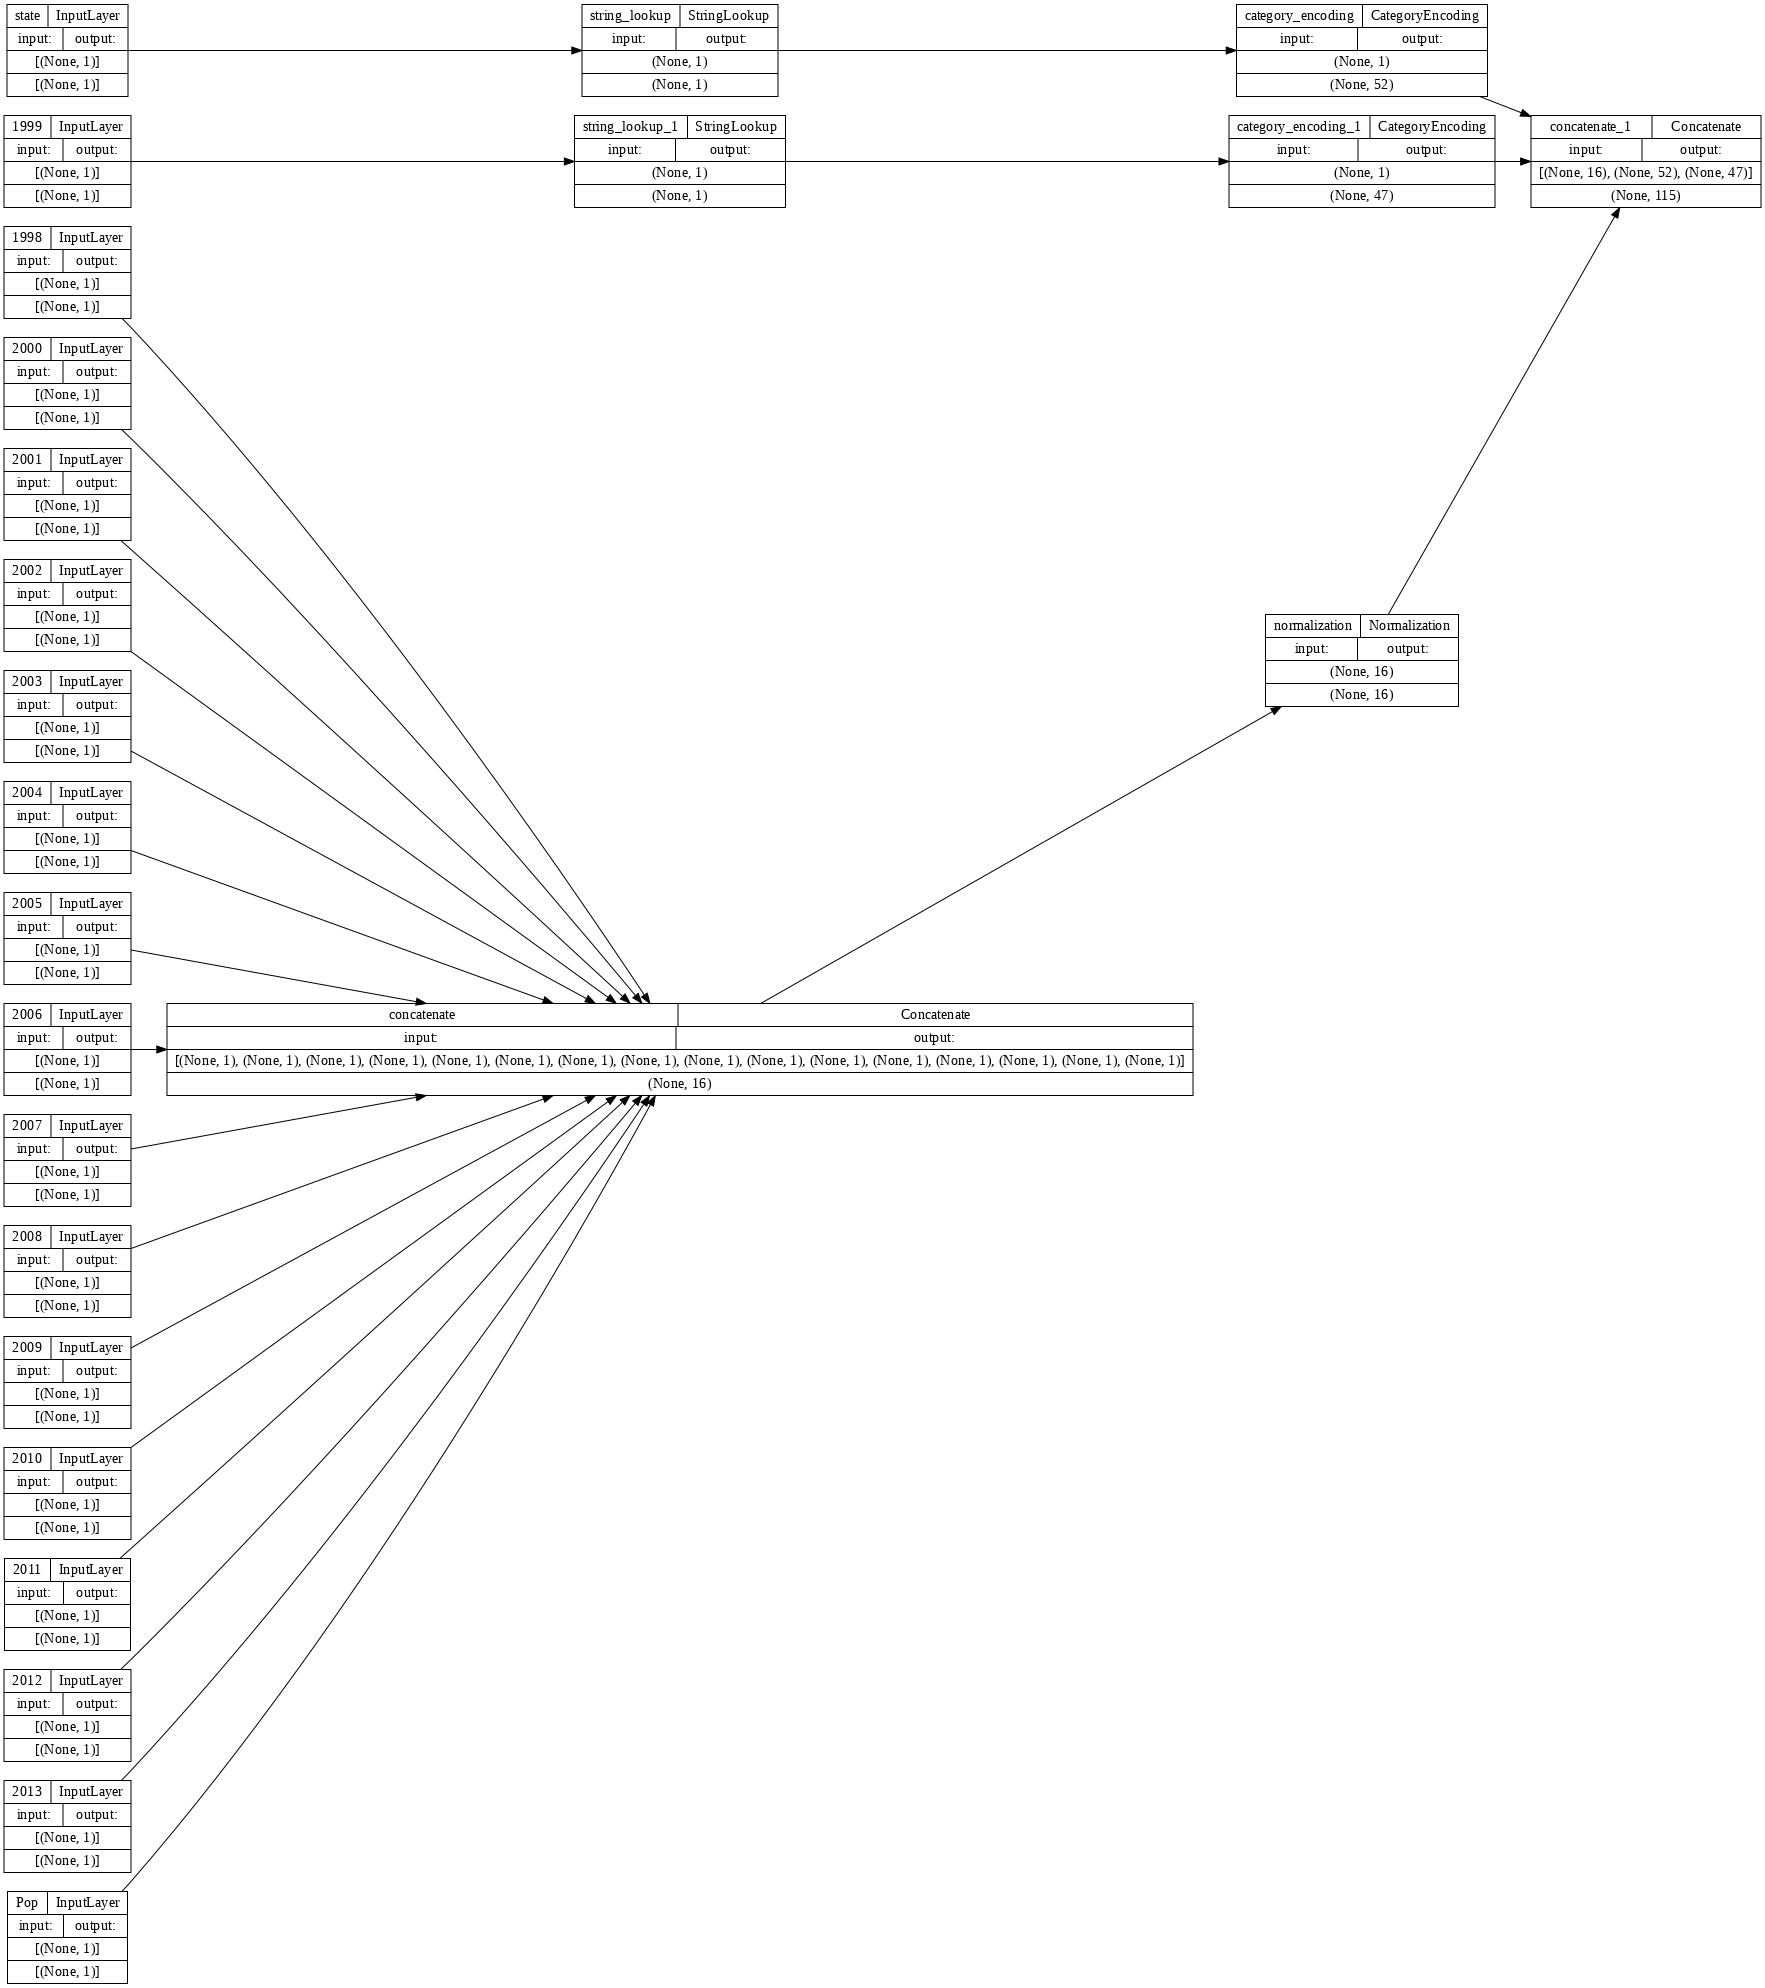

In [ ]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

df_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = df_preprocessing , rankdir="LR", dpi=72, show_shapes=True)


In [ ]:
df_dict = {name: np.array(value) 
                         for name, value in df.items()}

In [ ]:
  features_dict = {name:values[:1] for name, values in df_dict.items()}
df_preprocessing(features_dict)

<tf.Tensor: shape=(1, 214), dtype=float32, numpy=
array([[3.705, 4.471, 4.529, 4.268, 4.47 , 3.979, 4.038, 4.009, 3.723,
        3.458, 3.286, 3.668, 3.823, 4.272, 4.624, 4.617, 0.   , 0.   ,
        0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   

In [ ]:
def APCSA_Model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.losses.BinaryCrossentropy(from_logits=True),optimizer=tf.optimizers.Adam())
  return model

APCSA_Model = APCSA_Model(df_preprocessing, inputs)

In [ ]:
x=df_dict
y=proportion

APCSA_Model.fit(x, y, epochs=50, batch_size=1)

Epoch 1/50
51/51 [==============================] - 1s 5ms/step - loss: 0.6355
Epoch 2/50
51/51 [==============================] - 0s 5ms/step - loss: 0.3963
Epoch 3/50
51/51 [==============================] - 0s 6ms/step - loss: 0.2712
Epoch 4/50
51/51 [==============================] - 0s 8ms/step - loss: 0.1670
Epoch 5/50
51/51 [==============================] - 0s 4ms/step - loss: 0.1117
Epoch 6/50
51/51 [==============================] - 0s 5ms/step - loss: 0.0845
Epoch 7/50
51/51 [==============================] - 0s 4ms/step - loss: 0.0667
Epoch 8/50
51/51 [==============================] - 0s 6ms/step - loss: 0.0566
Epoch 9/50
51/51 [==============================] - 0s 4ms/step - loss: 0.0514
Epoch 10/50
51/51 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 11/50
51/51 [==============================] - 0s 6ms/step - loss: 0.0458
Epoch 12/50
51/51 [==============================] - 0s 6ms/step - loss: 0.0443
Epoch 13/50
51/51 [==============================

Text(0.5, 1.0, 'model loss')

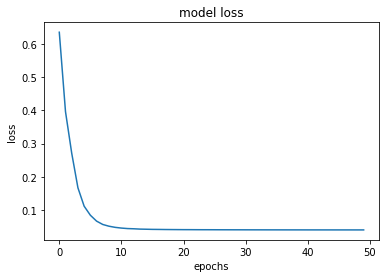

In [ ]:
loss = APCSA_Model.history.history['loss']
plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('model loss')

In [ ]:
# state = df1.pop('state')

# # population = df.pop('Pop')
# # population = np.array(population)


# # thirteen = df1.pop('2013')
# # thirteen = np.array(thirteen)

# proportion = []

# proportion = np.divide(thirteen, population) * 100


# model = tf.keras.Sequential([
#   layers.Dense(64),
#   layers.Dense(1)
# ])

# model.compile(loss = tf.losses.MeanSquaredError(), optimizer = tf.optimizers.Adam())

# model.fit(df1, state, epochs=10)

,state,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Pop
0,California,890,1981,2237,2664,2479,2396,2103,2095,2224,2151,2135,2193,2793,3101,3920,4964,38041430
1,Texas,825,1266,1743,2110,2191,1980,2099,2167,2411,2593,2951,3224,3392,3597,3614,3979,26059203
2,New York,802,1293,1429,1594,1677,1369,1366,1186,1141,1175,1050,1132,1460,1334,1821,1858,19570261
3,Virginia,365,733,677,838,636,640,591,535,646,888,859,913,1177,1203,1430,1655,8185867
4,Maryland,119,337,480,571,599,623,673,725,752,808,895,1038,1352,1330,1473,1629,5884563


TensorSpec(shape=(10,), dtype=tf.float32, name=None)